In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
# combine all csv into one dataframe
path = os.getcwd() + '/pose_data'
files = os.listdir(path)

final_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + '/' + file)
    df['label'] = file.split('.')[0]
    final_df = pd.concat([final_df, df], ignore_index=True)

In [3]:
body_pose_landmarks = ["nose","left eye inner","left eye","left eye outer",
                        "right eye inner","right eye","right eye outer",
                        "left ear","right ear","mouth left","mouth right",
                        "left shoulder","right shoulder","left elbow",
                        "right elbow","left wrist","right wrist","left pinky",
                        "right pinky","left index","right index","left thumb",
                        "right thumb","left hip","right hip","left knee",
                        "right knee","left ankle","right ankle","left heel",
                        "right heel", "left foot index","right foot index"]

col_name = []
for i in body_pose_landmarks:
    col_name += [i + '_X', i + '_Y', i + '_Z', i + '_V']

# rename columns
final_df.columns = col_name + ['label']

In [4]:
final_df

,nose_X,nose_Y,nose_Z,nose_V,left eye inner_X,left eye inner_Y,left eye inner_Z,left eye inner_V,left eye_X,left eye_Y,...,right heel_V,left foot index_X,left foot index_Y,left foot index_Z,left foot index_V,right foot index_X,right foot index_Y,right foot index_Z,right foot index_V,label
0,0.544536,0.261747,-0.191828,0.999297,0.549512,0.247008,-0.170033,0.999312,0.553208,0.246632,...,0.659899,0.545169,0.973575,-0.004307,0.979751,0.564355,0.708812,0.207060,0.684656,tree_data
1,0.501877,0.177308,-0.204558,0.999906,0.509858,0.161205,-0.176329,0.999883,0.513814,0.161368,...,0.922397,0.499676,0.661949,0.095757,0.836645,0.526667,0.917781,-0.025099,0.963109,tree_data
2,0.399920,0.222643,-0.261272,0.999634,0.410330,0.213970,-0.204106,0.999461,0.417404,0.214702,...,0.762350,0.422172,0.740239,-0.019755,0.736164,0.420179,0.858492,-0.292415,0.900488,tree_data
3,0.466361,0.359614,-0.366423,0.997576,0.474534,0.349394,-0.322601,0.997540,0.480053,0.349070,...,0.668833,0.439493,0.957202,-0.045964,0.935934,0.460402,0.743338,0.284203,0.600119,tree_data
4,0.461441,0.284309,-0.566891,0.999133,0.468821,0.271688,-0.526393,0.999079,0.475619,0.270789,...,0.905771,0.471193,0.683815,0.237712,0.650688,0.493756,0.907685,0.014034,0.931890,tree_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.507627,0.336952,-0.007861,0.999071,0.498864,0.324175,0.011432,0.998848,0.496988,0.324000,...,0.953517,0.497711,0.906221,0.307360,0.537619,0.492885,0.918248,-0.125202,0.955975,chair_data
2003,0.356493,0.359166,-0.048896,0.999656,0.369852,0.348138,-0.087334,0.999656,0.373022,0.348731,...,0.521658,0.391402,0.948819,-0.201327,0.933657,0.386821,0.943065,0.200720,0.411756,chair_data
2004,0.470691,0.298334,-0.032904,0.997351,0.466058,0.283985,-0.019674,0.996768,0.464965,0.283579,...,0.881593,0.463634,0.921256,0.231399,0.399279,0.460696,0.924303,-0.017946,0.893422,chair_data
2005,0.660507,0.364982,-0.092975,0.995907,0.661033,0.344904,-0.074424,0.994927,0.659451,0.343339,...,0.949374,0.552334,0.893624,0.414546,0.493191,0.548051,0.895228,-0.004784,0.950031,chair_data


In [5]:
# remove colums with V
final_df = final_df[final_df.columns[~final_df.columns.str.contains(' V')]]

In [6]:
final_df

,nose_X,nose_Y,nose_Z,nose_V,left eye inner_X,left eye inner_Y,left eye inner_Z,left eye inner_V,left eye_X,left eye_Y,...,right heel_V,left foot index_X,left foot index_Y,left foot index_Z,left foot index_V,right foot index_X,right foot index_Y,right foot index_Z,right foot index_V,label
0,0.544536,0.261747,-0.191828,0.999297,0.549512,0.247008,-0.170033,0.999312,0.553208,0.246632,...,0.659899,0.545169,0.973575,-0.004307,0.979751,0.564355,0.708812,0.207060,0.684656,tree_data
1,0.501877,0.177308,-0.204558,0.999906,0.509858,0.161205,-0.176329,0.999883,0.513814,0.161368,...,0.922397,0.499676,0.661949,0.095757,0.836645,0.526667,0.917781,-0.025099,0.963109,tree_data
2,0.399920,0.222643,-0.261272,0.999634,0.410330,0.213970,-0.204106,0.999461,0.417404,0.214702,...,0.762350,0.422172,0.740239,-0.019755,0.736164,0.420179,0.858492,-0.292415,0.900488,tree_data
3,0.466361,0.359614,-0.366423,0.997576,0.474534,0.349394,-0.322601,0.997540,0.480053,0.349070,...,0.668833,0.439493,0.957202,-0.045964,0.935934,0.460402,0.743338,0.284203,0.600119,tree_data
4,0.461441,0.284309,-0.566891,0.999133,0.468821,0.271688,-0.526393,0.999079,0.475619,0.270789,...,0.905771,0.471193,0.683815,0.237712,0.650688,0.493756,0.907685,0.014034,0.931890,tree_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.507627,0.336952,-0.007861,0.999071,0.498864,0.324175,0.011432,0.998848,0.496988,0.324000,...,0.953517,0.497711,0.906221,0.307360,0.537619,0.492885,0.918248,-0.125202,0.955975,chair_data
2003,0.356493,0.359166,-0.048896,0.999656,0.369852,0.348138,-0.087334,0.999656,0.373022,0.348731,...,0.521658,0.391402,0.948819,-0.201327,0.933657,0.386821,0.943065,0.200720,0.411756,chair_data
2004,0.470691,0.298334,-0.032904,0.997351,0.466058,0.283985,-0.019674,0.996768,0.464965,0.283579,...,0.881593,0.463634,0.921256,0.231399,0.399279,0.460696,0.924303,-0.017946,0.893422,chair_data
2005,0.660507,0.364982,-0.092975,0.995907,0.661033,0.344904,-0.074424,0.994927,0.659451,0.343339,...,0.949374,0.552334,0.893624,0.414546,0.493191,0.548051,0.895228,-0.004784,0.950031,chair_data


In [7]:
def angle(self, point1, point2, point3):
    """ Calculate angle between two lines """
    if(point1==(0,0) or point2==(0,0) or point3==(0,0)):
        return 0
    numerator = point2[1] * (point1[0] - point3[0]) + point1[1] * \
                (point3[0] - point2[0]) + point3[1] * (point2[0] - point1[0])
    denominator = (point2[0] - point1[0]) * (point1[0] - point3[0]) + \
                (point2[1] - point1[1]) * (point1[1] - point3[1])
    try:
        ang = math.atan(numerator/denominator)
        ang = ang * 180 / math.pi
        if ang < 0:
            ang = 180 + ang
        return ang
    except:
        return 90.0

In [8]:
# '''
# f1: angle between left shoulder, left elbow, left wrist
# f2: angle between right shoulder, right elbow, right wrist
# f3: angle between left shoulder, left hip, left knee
# f4: angle between right shoulder, right hip, right knee
# f5: angle between left hip, left knee, left ankle
# f6: angle between right hip, right knee, right ankle
# f7: angle between nose, left shoulder, left hip
# f8: angle between nose, right shoulder, right hip
# f9: angle between left shoulder, nose, right shoulder
# f10: angle between left knee, left ankle, left foot index
# f11: angle between right knee, right ankle, right foot index
# f12: angle between left index, left wrist, left thumb
# f13: angle between right index, right wrist, right thumb
# f14: angle between left shoulder, left hip, left foot index
# f15: angle between right shoulder, right hip, right foot index
# '''

# feature_df = pd.DataFrame()

# feature_df['f1'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left elbow X'], x['left elbow Y']), (x['left wrist X'], x['left wrist Y'])), axis=1)
# feature_df['f2'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right elbow X'], x['right elbow Y']), (x['right wrist X'], x['right wrist Y'])), axis=1)
# feature_df['f3'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y']), (x['left knee X'], x['left knee Y'])), axis=1)
# feature_df['f4'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y']), (x['right knee X'], x['right knee Y'])), axis=1)
# feature_df['f5'] = final_df.apply(lambda x: angle(x, (x['left hip X'], x['left hip Y']), (x['left knee X'], x['left knee Y']), (x['left ankle X'], x['left ankle Y'])), axis=1)
# feature_df['f6'] = final_df.apply(lambda x: angle(x, (x['right hip X'], x['right hip Y']), (x['right knee X'], x['right knee Y']), (x['right ankle X'], x['right ankle Y'])), axis=1)
# feature_df['f7'] = final_df.apply(lambda x: angle(x, (x['nose X'], x['nose Y']), (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y'])), axis=1)
# feature_df['f8'] = final_df.apply(lambda x: angle(x, (x['nose X'], x['nose Y']), (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y'])), axis=1)
# feature_df['f9'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['nose X'], x['nose Y']), (x['right shoulder X'], x['right shoulder Y'])), axis=1)
# feature_df['f10'] = final_df.apply(lambda x: angle(x, (x['left knee X'], x['left knee Y']), (x['left ankle X'], x['left ankle Y']), (x['left foot index X'], x['left foot index Y'])), axis=1)
# feature_df['f11'] = final_df.apply(lambda x: angle(x, (x['right knee X'], x['right knee Y']), (x['right ankle X'], x['right ankle Y']), (x['right foot index X'], x['right foot index Y'])), axis=1)
# feature_df['f12'] = final_df.apply(lambda x: angle(x, (x['left index X'], x['left index Y']), (x['left wrist X'], x['left wrist Y']), (x['left thumb X'], x['left thumb Y'])), axis=1)
# feature_df['f13'] = final_df.apply(lambda x: angle(x, (x['right index X'], x['right index Y']), (x['right wrist X'], x['right wrist Y']), (x['right thumb X'], x['right thumb Y'])), axis=1)
# feature_df['f14'] = final_df.apply(lambda x: angle(x, (x['left shoulder X'], x['left shoulder Y']), (x['left hip X'], x['left hip Y']), (x['left foot index X'], x['left foot index Y'])), axis=1)
# feature_df['f15'] = final_df.apply(lambda x: angle(x, (x['right shoulder X'], x['right shoulder Y']), (x['right hip X'], x['right hip Y']), (x['right foot index X'], x['right foot index Y'])), axis=1)

In [9]:
# remove certain body landmarks
remove_list = ['left eye', 'left eye inner', 'left eye outer', 'left ear', 'right eye', 'right eye inner', 'right eye outer', 'right ear', 'mouth left', 'mouth right', 'left pinky', 'right pinky', 'left thumb', 'right thumb', 'left heel', 'right heel']

for i in remove_list:
    final_df = final_df[final_df.columns[~final_df.columns.str.contains(i)]]

In [10]:
feature_df = pd.DataFrame()

for i in remove_list:
    body_pose_landmarks.remove(i)
all_angles = list(combinations(body_pose_landmarks, 3))

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
i = 0
mapping = {}

for i in range(len(all_angles)):
    feature_df['f' + str(i+1)] = final_df.apply(lambda x: angle(x, (x[all_angles[i][0] + '_X'], x[all_angles[i][0] + '_Y']), (x[all_angles[i][1] + '_X'], x[all_angles[i][1] + '_Y']), (x[all_angles[i][2] + '_X'], x[all_angles[i][2] + '_Y'])), axis=1)
    mapping['f' + str(i+1)] = all_angles[i]

In [13]:
feature_df['label'] = final_df['label']
feature_df['label'] = feature_df['label'].replace('tree_data',0) 
feature_df['label'] = feature_df['label'].replace('cobra_data',1)
feature_df['label'] = feature_df['label'].replace('downdog_data',2)
feature_df['label'] = feature_df['label'].replace('goddess_data',3)
feature_df['label'] = feature_df['label'].replace('warrior_data',4)
feature_df['label'] = feature_df['label'].replace('chair_data',5)

label_converted = feature_df['label']

In [14]:
feature_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f672,f673,f674,f675,f676,f677,f678,f679,f680,label
0,116.422254,99.853645,2.731381,125.270520,155.271777,127.508277,152.577060,146.210079,136.751717,142.540829,...,176.640823,48.681775,100.662069,152.703020,52.040952,176.675791,174.083208,177.407416,21.978278,0
1,118.309631,174.121959,130.387493,154.771148,143.979325,151.042582,144.311495,157.657459,147.055268,170.976225,...,21.719667,22.686990,0.256290,1.223613,0.967323,159.178571,2.095533,22.916962,5.244642,0
2,73.392540,53.136098,21.734778,108.488146,150.776496,122.659458,135.369483,141.573735,120.825805,160.886178,...,133.262897,122.853921,10.169906,179.760930,169.591024,170.496897,6.311141,15.814243,13.394363,0
3,81.650446,71.683254,7.349901,114.099490,138.109724,121.226714,131.893078,129.913455,110.492523,124.346681,...,177.156257,33.072542,130.992917,166.909202,35.916285,16.789176,166.912616,150.123440,30.179671,0
4,89.918530,82.294910,6.808281,124.988824,141.233026,130.219075,135.783942,143.455123,126.163637,163.378847,...,16.857746,33.958420,162.846989,179.947663,17.100674,147.663202,1.932423,34.269221,3.855804,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,178.620254,66.831918,52.733290,42.088480,38.925384,43.840108,41.642214,24.632521,23.323057,50.739666,...,24.916005,23.620786,23.333001,22.037782,178.704782,72.899844,63.400907,170.501063,169.682450,5
2003,177.288581,26.348488,27.624371,3.555730,5.065061,177.756410,178.859992,174.649830,173.209002,136.142280,...,144.821603,143.419877,145.225502,143.823776,178.598275,66.515302,63.476474,176.961173,176.690040,5
2004,174.218822,38.764016,46.467234,29.622843,30.832102,29.711026,30.575595,12.895210,12.184232,27.264993,...,13.860103,13.035703,14.476766,13.652365,179.175599,78.908373,74.526886,175.618513,175.533232,5
2005,3.960780,100.035196,89.225893,84.206328,78.610970,82.734630,79.008006,46.108109,47.430403,78.972604,...,22.063636,20.948564,21.642988,20.527915,178.884928,76.300006,73.183927,176.883921,177.002167,5


In [15]:
# Calculate the Pearson correlation coefficient for each feature with the label
corr = feature_df.corr()['label']

# Sort the features based on their correlation
sorted_features = corr.abs().sort_values(ascending=False)
print(sorted_features)

label    1.000000
f105     0.405245
f103     0.404930
f210     0.380143
f98      0.372470
           ...   
f637     0.001053
f490     0.000559
f404     0.000548
f54      0.000275
f147     0.000089
Name: label, Length: 681, dtype: float64


In [16]:
# select top 15 features
for i in sorted_features[1:16].index:
    print(mapping[i], corr[i])

('nose', 'right hip', 'right foot index') 0.40524468167708805
('nose', 'right hip', 'right ankle') 0.4049299011588907
('left shoulder', 'right hip', 'right foot index') 0.3801426463635325
('nose', 'left hip', 'left foot index') -0.3724700754067508
('nose', 'left hip', 'left ankle') -0.3639389209107843
('right hip', 'left ankle', 'right ankle') 0.36056484973076264
('right wrist', 'right hip', 'right ankle') 0.3559928018944289
('left shoulder', 'right hip', 'right ankle') 0.3544151124645805
('right index', 'right hip', 'right ankle') 0.3538092080461151
('right hip', 'left foot index', 'right foot index') 0.3507734718207631
('right wrist', 'right hip', 'right foot index') 0.3373584370118471
('right index', 'right hip', 'right foot index') 0.3362647030603251
('right shoulder', 'left hip', 'left foot index') -0.33302188451925147
('left index', 'right hip', 'right foot index') 0.331027335376778
('left hip', 'left ankle', 'right ankle') 0.31593297004350956


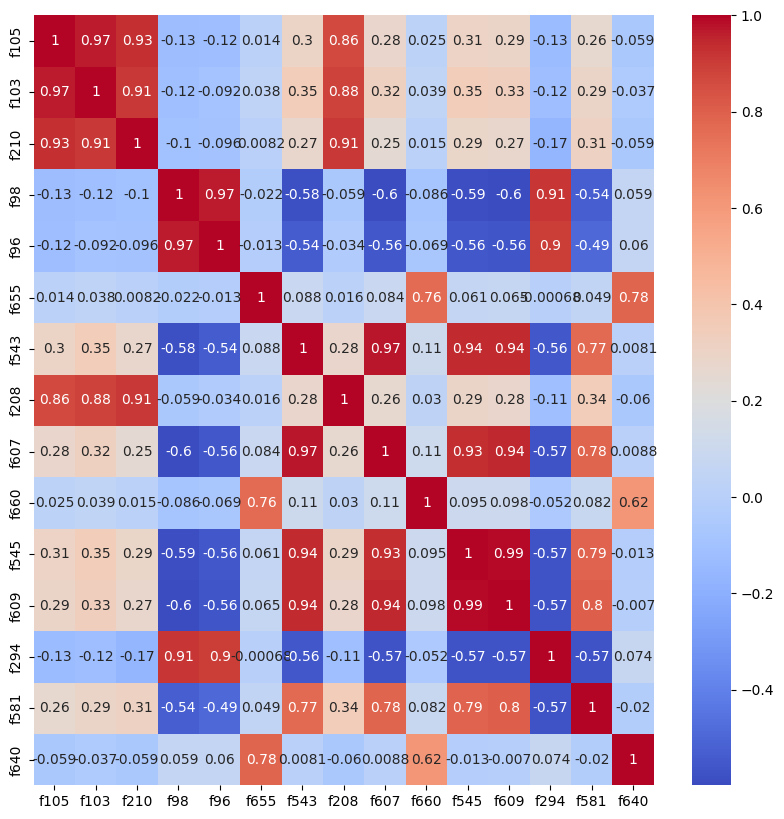

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(feature_df[sorted_features[1:16].index].corr(), annot=True, cmap='coolwarm')
plt.show()

0 - tree data, 1 - cobra data, 2 - downdog data, 3 - goddess data, 4 - warrior data, 5 - chair data

In [20]:
#keeping top 15 features in feature_df
feature_df = feature_df[sorted_features[1:16].index]

# add label to feature_df and replace label with numbers
feature_df['label'] = label_converted

# save feature_df
feature_df.to_csv('feature_class.csv',index=False)

In [21]:
# plot all features with label
sns.pairplot(feature_df, hue='label', palette='coolwarm')
plt.show()